In [ ]:
# https://github.com/jleuschen17/EE399/tree/master/homework3

In [19]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from keras.datasets import mnist
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
X_train = X_train.reshape(60000, 784).T
X_test = X_test.reshape(10000, 784).T

In [22]:
U, S, V = np.linalg.svd(X_train, full_matrices=False)

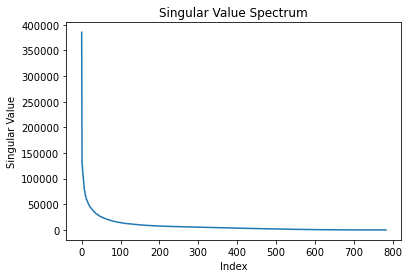

In [23]:
plt.plot(S)
plt.title("Singular Value Spectrum")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.show()

In [24]:
cumEnergy = np.cumsum(S**2) / np.sum(S**2)
cutoff = 0.95
rank = np.where(cumEnergy >= cutoff)[0][0]

In [25]:
print(f"Rank for image reconstruction (95% of images): {rank}")

Rank for image reconstruction (95% of images): 102


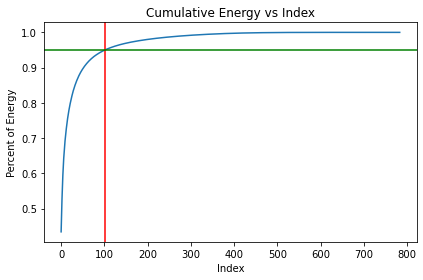

In [26]:
plt.plot(cumEnergy)
plt.xlabel("Index")
plt.ylabel("Percent of Energy")
plt.title("Cumulative Energy vs Index")
plt.axvline(102, c='r')
plt.axhline(0.95, c='g')
plt.tight_layout()

In [27]:
S = np.diag(S)

In [28]:
rank

102

In [29]:
#U: The columns of the U matrix represent the 'eigenimages' or the basis images. These basis images can be combined with varying weights to produce an approximation of the images in the dataset.
U

array([[ 0.00000000e+00,  1.38777878e-17,  2.77555756e-17, ...,
         0.00000000e+00, -5.81716688e-01,  1.80671650e-01],
       [ 0.00000000e+00,  9.02056208e-17, -8.32667268e-17, ...,
         0.00000000e+00, -4.09931607e-01, -5.23182528e-01],
       [ 0.00000000e+00,  1.38777878e-17,  0.00000000e+00, ...,
         0.00000000e+00,  2.87894049e-01, -7.23108155e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [30]:
#Σ: The Σ matrix contains the singular values, which represent the relative importance of each mode in the reconstruction of the images in the dataset. The larger the singular value, the more important the corresponding mode is in capturing the important features of the data.
S

array([[3.85502675e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.30874349e+05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.20811503e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.72532642e-11, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.09703625e-11, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.95635996e-12]])

In [31]:
#V: The V matrix contains information about the weights of the basis images (U) needed to reconstruct the images in the dataset. Each column of V corresponds to an image in the dataset, and its elements represent the weights of the basis images that sum up to reconstruct the original image.
V

array([[-4.29841361e-03, -4.54861007e-03, -2.07736121e-03, ...,
        -3.24628919e-03, -2.90197937e-03, -3.03798972e-03],
       [ 3.62575515e-04, -7.14862435e-03, -2.57893987e-03, ...,
         1.08595648e-03, -2.50423834e-03,  1.02162195e-03],
       [-2.55194939e-03, -2.55021953e-03,  3.12045898e-03, ...,
         1.33807944e-03, -1.22752214e-04, -1.77240995e-04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.25436674e-04, -2.35419651e-05, -1.08778897e-04],
       [ 0.00000000e+00, -4.89422283e-01,  1.84781463e-01, ...,
         1.86179694e-04,  8.70288195e-04,  5.27860935e-05],
       [ 9.91484668e-01, -2.83274245e-04, -1.16738127e-03, ...,
        -1.01077991e-03,  1.75972417e-04,  2.44722505e-05]])

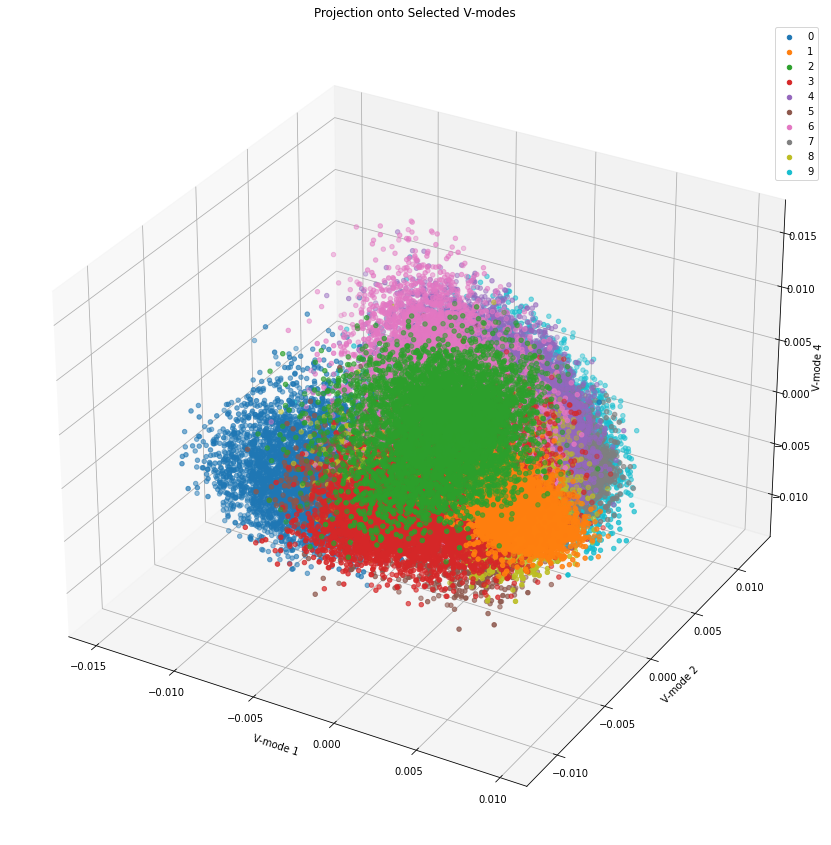

<Figure size 432x288 with 0 Axes>

In [32]:
modes = [1, 2, 4]
V_targets = V.T[:, modes]
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    idx = np.where(y_train == i)
    ax.scatter(V_targets[idx, 0], V_targets[idx, 1], V_targets[idx, 2], label = f'{i}')

ax.set_title('Projection onto Selected V-modes')
ax.set_xlabel(f'V-mode {modes[0]}')
ax.set_ylabel(f'V-mode {modes[1]}')
ax.set_zlabel(f'V-mode {modes[2]}')
ax.legend()
plt.show()
plt.tight_layout(pad=2)

In [33]:


#This 3D plot visualization shows the distribution of images in the selected V-mode subspace. Each point represents an image, and the points are colored according to their digit labels. The visualization can help identify whether certain digit classes are more separable in lower-dimensional space, which can be useful for applications such as dimensionality reduction or classification.

#Overall, by performing the SVD analysis of the MNIST dataset, we can gain insights into the inherent structure and lower-dimensional representation of the images. This can help in tasks such as image compression, reconstruction, and classification.

In [34]:

#By analyzing this 3D plot, one can understand how the selected modes contribute to differentiating the images and their digit classes. If you select informative modes, you may notice that images with different digit labels cluster together in different parts of the 3D space.

In [35]:
digits = [3, 8]
trainIndex = np.isin(y_train, digits)
testIndex = np.isin(y_test, digits)

X_train_digits = X_train[:, trainIndex]
y_train_digits = y_train[trainIndex]
X_test_digits = X_test[:, testIndex]
y_test_digits = y_test[testIndex]

In [36]:
X_train_pca = np.dot(U[:, :rank].T, X_train_digits)
X_test_pca = np.dot(U[:, :rank].T, X_test_digits)

In [37]:
lda = LDA()
lda.fit(X_train_pca.T, y_train_digits)

LinearDiscriminantAnalysis()

In [38]:
yPredictions = lda.predict(X_test_pca.T)

In [39]:
accuracy = accuracy_score(y_test_digits, yPredictions)
accuracy

0.9637096774193549

In [40]:
digits2 = [2, 5, 8]
trainIndex2 = np.isin(y_train, digits2)
testIndex2 = np.isin(y_test, digits2)

In [41]:

X_train_digits2 = X_train[:, trainIndex2]
y_train_digits2 = y_train[trainIndex2]
X_test_digits2 = X_test[:, testIndex2]
y_test_digits2 = y_test[testIndex2]
X_train_pca2 = np.dot(U[:, :rank].T, X_train_digits2)
X_test_pca2 = np.dot(U[:, :rank].T, X_test_digits2)
lda2 = LDA()
lda2.fit(X_train_pca2.T, y_train_digits2)
yPredictions2 = lda2.predict(X_test_pca2.T)
accuracy2 = accuracy_score(y_test_digits2, yPredictions2)
accuracy2

0.9382332643202208

In [42]:
def runLDA(digit1, digit2):
    trainIndex = np.isin(y_train, [i, j])
    testIndex = np.isin(y_test, [i, j])
    X_train_digits = X_train[:, trainIndex]
    y_train_digits = y_train[trainIndex]
    X_test_digits = X_test[:, testIndex]
    y_test_digits = y_test[testIndex]
    X_train_pca = np.dot(U[:, :rank].T, X_train_digits)
    X_test_pca = np.dot(U[:, :rank].T, X_test_digits)
    lda = LDA()
    lda.fit(X_train_pca.T, y_train_digits)
    yPredictions = lda.predict(X_test_pca.T)
    accuracy = accuracy_score(y_test_digits, yPredictions)
    return accuracy

In [43]:
combos = {}
for i in range(10):
    for j in range(10):
        if i != j:
            accuracy = runLDA(i, j)
            # print(f"Accuracy for {i} and {j}: {accuracy}")
            combos[(i, j)] = accuracy

In [44]:
combosSorted = sorted(combos.items(), key=lambda x:x[1], reverse=True)

In [45]:
print(f"Easiest to separate: {combosSorted[0]}")
print(f"Hardest to separate: {combosSorted[-1]}")

Easiest to separate: ((6, 7), 0.9979859013091642)
Hardest to separate: ((8, 5), 0.9528403001071811)


In [46]:
#tree
tree = DecisionTreeClassifier(random_state=44)
tree.fit(X_train.T, y_train)
y_pred_tree = tree.predict(X_test.T)
accuracy = accuracy_score(y_test, y_pred_tree)
print(accuracy)
#Tree: PCA Space
tree_pca = DecisionTreeClassifier(random_state=44)
X_train_pca_tree = np.dot(U[:, :rank].T, X_train)
X_test_pca = np.dot(U[:, :rank].T, X_test)
tree_pca.fit(X_train_pca_tree.T, y_train)
y_pred_tree_pca = tree_pca.predict(X_test_pca.T)
accuracy_pca = accuracy_score(y_test, y_pred_tree_pca)
print(accuracy_pca)

0.8769
0.8419


In [47]:
#SVM
svm = SVC(probability=False)
svm.fit(X_train.T, y_train)
y_pred_svm = svm.predict(X_test.T)
accuracy = accuracy_score(y_test, y_pred_svm)
print(accuracy)
#Tree: PCA Space
svm_pca = SVC(probability=False)
X_train_pca_svm = np.dot(U[:, :rank].T, X_train)
X_test_pca = np.dot(U[:, :rank].T, X_test)
svm_pca.fit(X_train_pca_svm.T, y_train)
y_pred_svm_pca = svm_pca.predict(X_test_pca.T)
accuracy_pca = accuracy_score(y_test, y_pred_svm_pca)
print(accuracy_pca)

0.9792
0.9789


In [55]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).T
X_test = X_test.reshape(10000, 784).T

In [54]:
def run_model_pca(model, X_train, X_test, y_train, y_test, digitTargets, rank=102):
    train_idx = np.isin(y_train, digitTargets)
    test_idx = np.isin(y_test, digitTargets)
    X_train_filtered = X_train[:, train_idx]
    y_train_filtered = y_train[train_idx]
    X_test_filtered = X_test[:, test_idx]
    y_test_filtered = y_test[test_idx]
    X_train_pca = np.dot(U[:, :rank].T, X_train_filtered)
    X_test_pca = np.dot(U[:, :rank].T, X_test_filtered)
    model.fit(X_train_pca.T, y_train_filtered)
    y_pred = model.predict(X_test_pca.T)
    accuracy = accuracy_score(y_test_filtered, y_pred)
    y_pred2 = model.predict(X_train_pca.T)
    accuracy2 = accuracy_score(y_train_filtered, y_pred2)
    return accuracy, accuracy2


In [53]:
def run_model(model, X_train, X_test, y_train, y_test, digitTargets):
    train_idx = np.isin(y_train, digitTargets)
    test_idx = np.isin(y_test, digitTargets)
    X_train_filtered = X_train[:, train_idx]
    y_train_filtered = y_train[train_idx]
    X_test_filtered = X_test[:, test_idx]
    y_test_filtered = y_test[test_idx]
    model.fit(X_train_filtered.T, y_train_filtered)
    y_pred = model.predict(X_test_filtered.T)
    accuracy = accuracy_score(y_test_filtered, y_pred)
    y_pred2 = model.predict(X_train_filtered.T)
    accuracy2 = accuracy_score(y_train_filtered, y_pred2)
    return accuracy, accuracy2

In [56]:
results = {}
results["easy_tree_test"], results["easy_tree_train"] = run_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test, [6, 7])
results["easy_svm_test"], results["easy_svm_train"] = run_model(SVC(), X_train, X_test, y_train, y_test, [6, 7])
results["easy_lda_test"], results["easy_lda_train"] = run_model(LDA(), X_train, X_test, y_train, y_test, [6, 7])
results["hard_tree_test"], results["hard_tree_train"] = run_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test, [5, 8])
results["hard_svm_test"], results["hard_svm_train"] = run_model(SVC(), X_train, X_test, y_train, y_test, [5, 8])
results["hard_lda_test"], results["hard_lda_train"] = run_model(LDA(), X_train, X_test, y_train, y_test, [5, 8])
results["easy_tree_test_pca"], results["easy_tree_train_pca"] = run_model_pca(DecisionTreeClassifier(), X_train, X_test, y_train, y_test, [6, 7], rank)
results["easy_svm_test_pca"], results["easy_svm_train_pca"] = run_model_pca(SVC(), X_train, X_test, y_train, y_test, [6, 7], rank)
results["easy_lda_test_pca"], results["easy_lda_train_pca"] = run_model_pca(LDA(), X_train, X_test, y_train, y_test, [6, 7], rank)
results["hard_tree_test_pca"], results["hard_tree_train_pca"] = run_model_pca(DecisionTreeClassifier(), X_train, X_test, y_train, y_test, [5, 8], rank)
results["hard_svm_test_pca"], results["hard_svm_train_pca"] = run_model_pca(SVC(), X_train, X_test, y_train, y_test, [5, 8], rank)
results["hard_lda_test_pca"], results["hard_lda_train_pca"] = run_model_pca(SVC(), X_train, X_test, y_train, y_test, [5, 8], rank)

In [57]:
results


{'easy_tree_test': 0.9924471299093656,
 'easy_tree_train': 1.0,
 'easy_svm_test': 0.998992950654582,
 'easy_svm_train': 0.9999179184109004,
 'easy_lda_test': 0.9954682779456193,
 'easy_lda_train': 0.9991791841090043,
 'hard_tree_test': 0.9630225080385852,
 'hard_tree_train': 1.0,
 'hard_svm_test': 0.9957127545551983,
 'hard_svm_train': 0.997959545777147,
 'hard_lda_test': 0.9512325830653805,
 'hard_lda_train': 0.9677963094393187,
 'easy_tree_test_pca': 0.9843907351460222,
 'easy_tree_train_pca': 1.0,
 'easy_svm_test_pca': 0.998992950654582,
 'easy_svm_train_pca': 0.9998358368218009,
 'easy_lda_test_pca': 0.9979859013091642,
 'easy_lda_train_pca': 0.9980300418616105,
 'hard_tree_test_pca': 0.9303322615219721,
 'hard_tree_train_pca': 1.0,
 'hard_svm_test_pca': 0.9946409431939979,
 'hard_svm_train_pca': 0.9963626685592619,
 'hard_lda_test_pca': 0.9946409431939979,
 'hard_lda_train_pca': 0.9963626685592619}